![(sea urchin)sushi](https://cdn.emojidex.com/emoji/seal/(sea_urchin)sushi.png "(sea urchin)sushi")
# What I miss from home: sea urchin = *uni*  
  
🍣Uni (pronounced "oo-nee") is beloved sushi topping in Japan.🍣  

US exports a lot of uni to Japan. 
Yes, there should be uni somewhere🤔  　　   
Then which State is the best to eat fresh uni?  

**Data I Used**    

Two datasets form the database of [NOAA (National Oceanic and Atmospheric Administration)](https://www.fisheries.noaa.gov/)  
One datasert from [Canadian International Merchandise Trade Web Application](https://www150.statcan.gc.ca/n1/pub/71-607-x/71-607-x2021004-eng.htm )







In [1]:
# Which States produce sea urchin? 
# Data retrieved from NOAA (National Oceanic and Atmospheric Administration)
# https://www.fisheries.noaa.gov/foss/f?p=215:200:16425228410453::NO:RP::
import pandas as pd

df = pd.read_csv('foss_landings.csv')
pd.set_option("display.max_columns", None)

df.head()

,Year,State,Pounds,Metric Tons,Dollars,Collection
0,2011,MAINE,"2,407,074","1,092","5,113,355",Commercial
1,2011,HAWAII,2,0,18,Commercial
2,2011,OREGON,"588,193",267,"313,488",Commercial
3,2011,CALIFORNIA,"11,573,153","5,250","8,205,881",Commercial
4,2011,WASHINGTON,"192,684",87,"171,004",Commercial


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 89 entries, 0 to 88
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Year         89 non-null     int64 
 1   State        89 non-null     object
 2   Pounds       69 non-null     object
 3   Metric Tons  69 non-null     object
 4   Dollars      69 non-null     object
 5   Collection   89 non-null     object
dtypes: int64(1), object(5)
memory usage: 4.3+ KB


In [3]:
df2 = df.copy()
df2.Pounds = df2.Pounds.str.replace(',','').astype(float, errors='ignore').astype(int, errors='ignore')
df2['Metric Tons'] = df2['Metric Tons'].str.replace(',','').astype(float, errors='ignore').astype(int,errors='ignore')
df2.Dollars = df2.Dollars.str.replace(',','').astype(float, errors='ignore').astype(int, errors='ignore')

In [4]:
df2.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 89 entries, 0 to 88
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Year         89 non-null     int64  
 1   State        89 non-null     object 
 2   Pounds       69 non-null     float64
 3   Metric Tons  69 non-null     float64
 4   Dollars      69 non-null     float64
 5   Collection   89 non-null     object 
dtypes: float64(3), int64(1), object(2)
memory usage: 4.3+ KB


In [5]:
df2.head()

,Year,State,Pounds,Metric Tons,Dollars,Collection
0,2011,MAINE,2407074.0,1092.0,5113355.0,Commercial
1,2011,HAWAII,2.0,0.0,18.0,Commercial
2,2011,OREGON,588193.0,267.0,313488.0,Commercial
3,2011,CALIFORNIA,11573153.0,5250.0,8205881.0,Commercial
4,2011,WASHINGTON,192684.0,87.0,171004.0,Commercial


In [6]:
df2[df2.Year == 2011].sort_values('Pounds', ascending=False)

,Year,State,Pounds,Metric Tons,Dollars,Collection
3,2011,CALIFORNIA,11573153.0,5250.0,8205881.0,Commercial
0,2011,MAINE,2407074.0,1092.0,5113355.0,Commercial
2,2011,OREGON,588193.0,267.0,313488.0,Commercial
4,2011,WASHINGTON,192684.0,87.0,171004.0,Commercial
6,2011,FLORIDA-WEST,43541.0,20.0,105971.0,Commercial
7,2011,MASSACHUSETTS,40709.0,18.0,58208.0,Commercial
5,2011,FLORIDA-EAST,5247.0,2.0,4116.0,Commercial
1,2011,HAWAII,2.0,0.0,18.0,Commercial
8,2011,NORTH CAROLINA,NaN,NaN,NaN,Commercial


In [7]:
df2.to_csv('uni_state.csv')




In [8]:
from plotnine import ggplot, aes, geom_point, geom_line, labs, theme_bw, facet_wrap, geom_smooth, stat_smooth,coord_cartesian


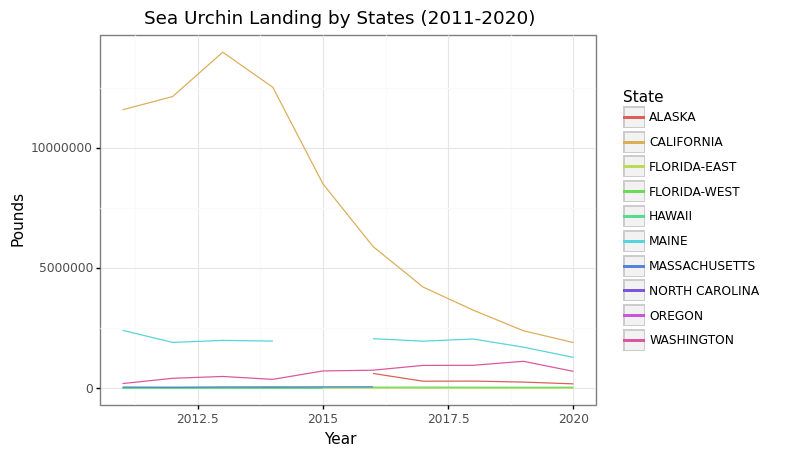

<ggplot: (89654118334)>

In [9]:
(
    ggplot(df2,                   
        aes(x='Year', y='Pounds', color = 'State'))          
        + geom_line() 
        + theme_bw()
        + labs(
            title = "Sea Urchin Landing by States (2011-2020)",
            y = "Pounds",
            x = "Year"
        )

        
        
)   

## California is the main producer of sea urchin  
**Arguably, the best place to find the freshest uni in the US!**  
  
Other analysis:    


-Sharp decline of landings is due to environmental problem caused by El Nino in 2016, according to the California Sea Urchin Commission.  
-The Commission [requested](https://calurchin.org/wp-content/uploads/2017-Sea-Urchin-Disaster-Request-20170516210100.pdf) the Governor to declare a disaster to pursue federal emergency funds for the local dishery industry.

### But CA produce a LOT of uni. Where do they go? 
...Export to Japan, maybe?

In [10]:
# Here is the dataset from NOAA
# Data on uni export with Japan (2011-2020)
df3 = pd.read_csv('annual_export_year_japan.csv')
pd.set_option("display.max_columns", None)

df3.head()

,Source,Year,Country Name,Volume (kg),Value (USD),Edible code
0,EXP,2011,JAPAN,"783,276","28,977,870",E
1,EXP,2012,JAPAN,"815,302","31,971,392",E
2,EXP,2013,JAPAN,"884,808","31,847,822",E
3,EXP,2014,JAPAN,"590,092","22,396,104",E
4,EXP,2015,JAPAN,"352,424","14,767,395",E


In [11]:
df4 = df3.copy()
df4['Volume (kg)'] = df4['Volume (kg)'].str.replace(',','').astype(float, errors='ignore').astype(int, errors='ignore')
df4['Value (USD)'] = df4['Value (USD)'].str.replace(',','').astype(float, errors='ignore').astype(int, errors='ignore')


In [12]:
df4.head()

,Source,Year,Country Name,Volume (kg),Value (USD),Edible code
0,EXP,2011,JAPAN,783276,28977870,E
1,EXP,2012,JAPAN,815302,31971392,E
2,EXP,2013,JAPAN,884808,31847822,E
3,EXP,2014,JAPAN,590092,22396104,E
4,EXP,2015,JAPAN,352424,14767395,E


In [13]:
# convert kg to lb
df4['Pounds'] = df4['Volume (kg)']* 2.2

In [14]:
df4.head()

,Source,Year,Country Name,Volume (kg),Value (USD),Edible code,Pounds
0,EXP,2011,JAPAN,783276,28977870,E,1723207.2
1,EXP,2012,JAPAN,815302,31971392,E,1793664.4
2,EXP,2013,JAPAN,884808,31847822,E,1946577.6
3,EXP,2014,JAPAN,590092,22396104,E,1298202.4
4,EXP,2015,JAPAN,352424,14767395,E,775332.8


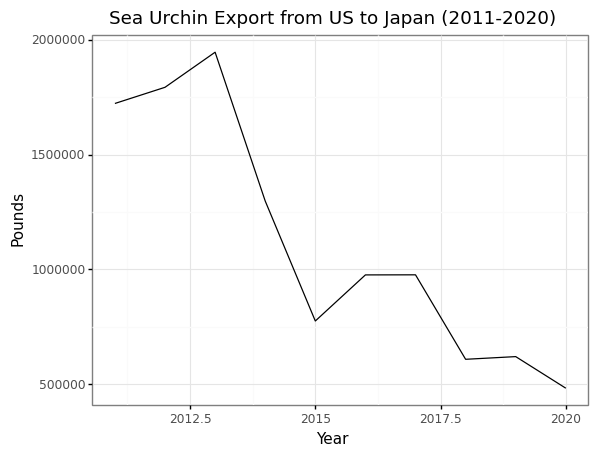

<ggplot: (89654117764)>

In [15]:
(
    ggplot(df4,                   
        aes(x='Year', y='Pounds'))          
        + geom_line() 
        + theme_bw()
        + labs(
            title = "Sea Urchin Export from US to Japan (2011-2020)",
            y = "Pounds",
            x = "Year"
        )

        
        
)   

### There are sharp decline of uni export to Japan. Still, the US exports nearly 500,000 lb uni to Japan. 

Now, does US import uni??

In [16]:
# This dataset is also from NOAA
# https://www.fisheries.noaa.gov/foss/wwv_flow.accept

df5 = pd.read_csv('annual_import_year.csv')
pd.set_option("display.max_columns", None)

df5.head()

,Source,Year,Country Name,Volume (kg),Value (USD),Edible code
0,IMP,2011,CANADA,"2,524,875","5,799,385",E
1,IMP,2011,CHILE,"9,879","247,468",E
2,IMP,2011,JAPAN,566,"87,965",E
3,IMP,2011,SOUTH KOREA,"1,252","12,520",E
4,IMP,2012,CANADA,"2,946,398","7,188,042",E


In [17]:
df6 = df5.copy()
df6['Volume (kg)'] = df6['Volume (kg)'].str.replace(',','').astype(float, errors='ignore').astype(int, errors='ignore')
df6['Value (USD)'] = df6['Value (USD)'].str.replace(',','').astype(float, errors='ignore').astype(int, errors='ignore')
df6['Pounds'] = df6['Volume (kg)']* 2.2
df6.head()

,Source,Year,Country Name,Volume (kg),Value (USD),Edible code,Pounds
0,IMP,2011,CANADA,2524875,5799385,E,5554725.0
1,IMP,2011,CHILE,9879,247468,E,21733.8
2,IMP,2011,JAPAN,566,87965,E,1245.2
3,IMP,2011,SOUTH KOREA,1252,12520,E,2754.4
4,IMP,2012,CANADA,2946398,7188042,E,6482075.6


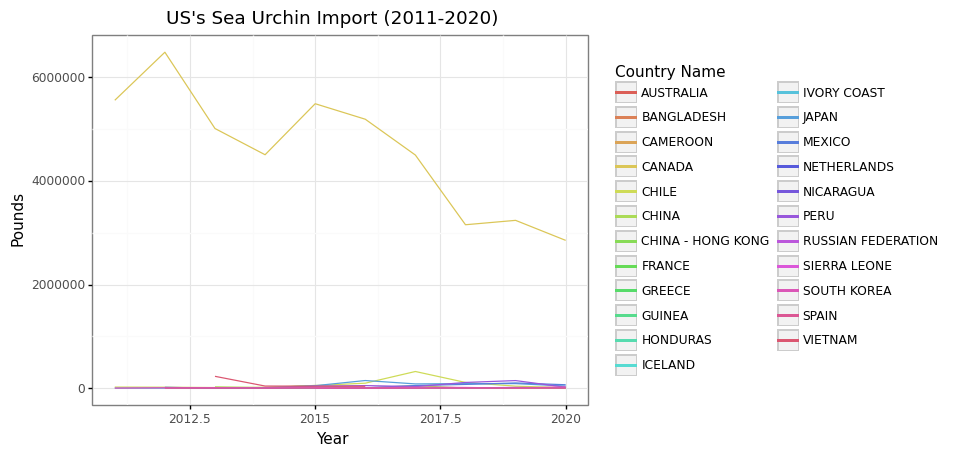

<ggplot: (89635392987)>

In [18]:
(
    ggplot(df6,                   
        aes(x='Year', y='Pounds', color = 'Country Name'))          
        + geom_line() 
        + theme_bw()
        + labs(
            title = "US's Sea Urchin Import (2011-2020)",
            y = "Pounds",
            x = "Year"
        )

        
        
)   

## US exports uni but it also import them a lot!  
  
 🍁Canada is the top exporter to the US.  
Considering the geographic proximity, Canadian uni could be the freshest and perhaps cheaper option.  
Note: You can't freeze uni! It spoils the creamy taste. So all the Japanese uni you can find at the Upper East Side's luxuary sushi bar are carefully carried by air (That's why they are so expensive😞)
 

In [19]:
# Which State in the US import sea urchin??
# Let me break down the data of Canada
# Data retrieved from Canadian International Merchandise Trade Web Application
#https://www150.statcan.gc.ca/n1/pub/71-607-x/71-607-x2021004-eng.htm 

cad = pd.read_csv('canada_export.csv')
pd.set_option("display.max_columns", None)

cad.tail(10)


,Period,Commodity,Province,Country,State,Value ($),Quantity,Unit of measure
134,1/1/2019,"0308.21.10 - Sea urchin roes and milt, fresh o...",Canada,Chad,NaN,18968.0,240.0,Weight in kilograms
135,1/1/2020,"0308.21.10 - Sea urchin roes and milt, fresh o...",Canada,Italy,NaN,13184.0,406.0,Weight in kilograms
136,1/1/2020,"0308.21.10 - Sea urchin roes and milt, fresh o...",Canada,United States,Washington,51116.0,337.0,Weight in kilograms
137,1/1/2020,"0308.21.10 - Sea urchin roes and milt, fresh o...",Canada,United States,Maine,41071.0,247.0,Weight in kilograms
138,1/1/2020,"0308.21.10 - Sea urchin roes and milt, fresh o...",Canada,Malaysia,NaN,2840.0,47.0,Weight in kilograms
139,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
140,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
141,How to cite: Statistics Canada. Canadian Inter...,NaN,NaN,NaN,NaN,NaN,NaN,NaN
142,https://www150.statcan.gc.ca/n1/pub/71-607-x/7...,NaN,NaN,NaN,NaN,NaN,NaN,NaN
143,Accessed date: 2022-01-27,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [20]:
# drop unwanted rows

cad = cad.drop(cad.index[139:])


In [21]:
# Change Period columns to Year
cad.Period = cad.Period.str.replace("1/1/","")


In [22]:
cad.rename(columns={'Period':'Year'}, inplace=True)

In [23]:
# Analysis


In [24]:
# Change quantity(kg) to Pounds

cad['Pounds'] = cad.Quantity * 2.2

In [25]:
cad.sort_values('Pounds', ascending=False)

,Year,Commodity,Province,Country,State,Value ($),Quantity,Unit of measure,Pounds
75,2013,"0308.21.10 - Sea urchin roes and milt, fresh o...",Canada,Japan,NaN,11006616.0,236625.0,Weight in kilograms,520575.0
21,2014,"0308.21.10 - Sea urchin roes and milt, fresh o...",Canada,Japan,NaN,9300770.0,206092.0,Weight in kilograms,453402.4
92,2012,"0308.21.10 - Sea urchin roes and milt, fresh o...",Canada,Japan,NaN,8997970.0,204257.0,Weight in kilograms,449365.4
41,2015,"0308.21.10 - Sea urchin roes and milt, fresh o...",Canada,Japan,NaN,9338551.0,191519.0,Weight in kilograms,421341.8
27,2016,"0308.21.10 - Sea urchin roes and milt, fresh o...",Canada,Japan,NaN,9589477.0,178781.0,Weight in kilograms,393318.2
...,...,...,...,...,...,...,...,...,...
138,2020,"0308.21.10 - Sea urchin roes and milt, fresh o...",Canada,Malaysia,NaN,2840.0,47.0,Weight in kilograms,103.4
93,2013,"0308.21.10 - Sea urchin roes and milt, fresh o...",Canada,Singapore,NaN,2350.0,39.0,Weight in kilograms,85.8
54,2018,"0308.21.10 - Sea urchin roes and milt, fresh o...",Canada,"South Africa, Republic of",NaN,2400.0,35.0,Weight in kilograms,77.0
4,2014,"0308.21.10 - Sea urchin roes and milt, fresh o...",Canada,Singapore,NaN,1321.0,26.0,Weight in kilograms,57.2


In [26]:
cad.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 139 entries, 0 to 138
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Year             139 non-null    object 
 1   Commodity        139 non-null    object 
 2   Province         139 non-null    object 
 3   Country          139 non-null    object 
 4   State            37 non-null     object 
 5   Value ($)        139 non-null    float64
 6   Quantity         139 non-null    float64
 7   Unit of measure  139 non-null    object 
 8   Pounds           139 non-null    float64
dtypes: float64(3), object(6)
memory usage: 10.9+ KB


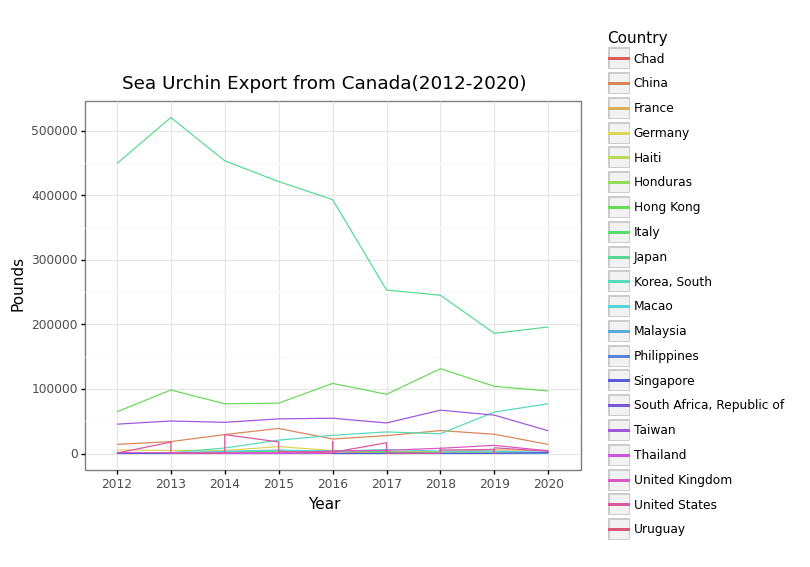

<ggplot: (89656557556)>

In [27]:
(
    ggplot(cad,                   
        aes(x='Year', y='Pounds', color='Country',group ='Country')) 
        + geom_line() 
        + theme_bw()
        + labs(
            title = "Sea Urchin Export from Canada(2012-2020)",
            y = "Pounds",
            x = "Year")        
) 

Canada export sea urchin mainly for Japan.  
There is not significant chanege in the export trend to the US

## But which State Import Canadian Sea Urchin the Most?


In [28]:
cad_us = cad[cad.Country == "United States"]
cad_us.State.value_counts()


Maine            9
New York         9
California       6
Washington       5
Massachusetts    3
Illinois         2
Hawaii           2
New Jersey       1
Name: State, dtype: int64

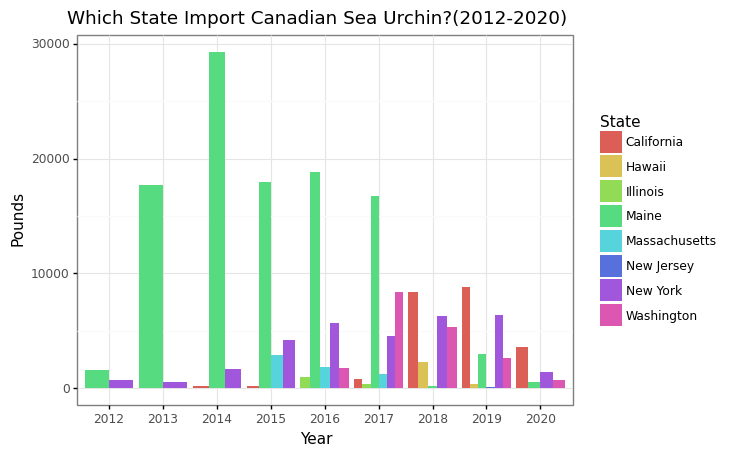

<ggplot: (89656750621)>

In [29]:
from plotnine import geom_bar
(
    ggplot(cad_us,                   
        aes(x='Year', y='Pounds', fill='State')) 
        + geom_bar(stat="identity",position = "dodge") 
        + theme_bw()
        + labs(
            title = "Which State Import Canadian Sea Urchin?(2012-2020)",
            y = "Pounds",
            x = "Year")        
) 

### Maine used be the top importer of uni from Canada. But why?

  
**Analysis from other sources**    
-Eastern Canada used to lack sea urchin processing facilities.  
-So they exported live sea urchin to the East Coast, mailnly Maine.
-On the other hands, Western Canada can export sea urchin directly to other countries.  
*source* :[the reseach paper](https://www.matis.is/media/matis/utgafa/10-17-Sea-Urchin-Market-Report.pdf) published by Matis, Icelandic R&D company )



### Again, California is probably the most likely place you can find fresh imported uni　😋😋😋